# German Credit - full utility evaluation

In [112]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns
import os
import random
import scipy.stats as stats

In [19]:
import warnings
warnings. filterwarnings('ignore')

In [20]:
os.chdir('C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox')
from datasets import GermanCredit, Dataset
from scheme import Universal

In [21]:
sns.set_theme()

## 0. Statistics of original data
### 0.1. Numerical

In [22]:
original_data = GermanCredit()

In [23]:
original_data.dataframe.mean()

Id                   499.500
duration              20.903
credit_amount       3271.258
installment_rate       2.973
residence_since        2.845
age                   35.546
existing_credits       1.407
liable_people          1.155
target                 1.300
dtype: float64

In [24]:
original_data.dataframe.std()

Id                   288.819436
duration              12.058814
credit_amount       2822.736876
installment_rate       1.118715
residence_since        1.103718
age                   11.375469
existing_credits       0.577654
liable_people          0.362086
target                 0.458487
dtype: float64

### 0.2. Categorical

In [25]:
original_data.categorical_attributes

Index(['checking_account', 'credit_hist', 'purpose', 'savings',
       'employment_since', 'sex_status', 'debtors', 'property',
       'installment_other', 'housing', 'job', 'tel', 'foreign'],
      dtype='object')

<Axes: xlabel='credit_hist', ylabel='count'>

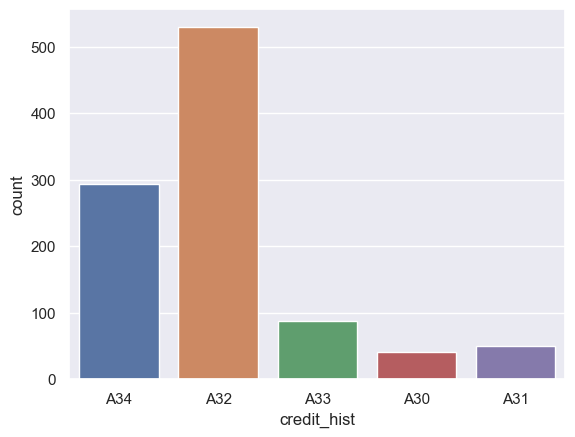

In [26]:
sns.countplot(x='credit_hist', data= original_data.dataframe)

## 1. Statistics of fingerprinted data 

In [39]:
mean_dataframe = pd.DataFrame()
std_dataframe = pd.DataFrame()
var_dataframe = pd.DataFrame()
all_fp_datasets = os.listdir('evaluation/fingerprinted_data/german_credit')
for fp_dataset_path in all_fp_datasets:
    fp_dataset = Dataset(path='evaluation/fingerprinted_data/german_credit/' + fp_dataset_path,
                                  target_attribute='target', primary_key_attribute='Id')
    a, b, fp_len, gamma, xi, secret_key, r = fp_dataset_path.split('_')
    fp_len = int(fp_len[1:]); gamma = float(gamma[1:]); xi = int(xi[1:]); secret_key = int(secret_key)
    if fp_len!=32: continue
    
    mean = fp_dataset.dataframe.mean()
    std = fp_dataset.dataframe.std()
    var = fp_dataset.dataframe.var()
    mean['gamma'] = var['gamma'] = std['gamma'] = gamma
    mean['xi'] = var['xi'] = std['xi'] = xi

    mean_dataframe = mean_dataframe.append(mean, ignore_index=True)
    std_dataframe = std_dataframe.append(std, ignore_index=True)
    var_dataframe = var_dataframe.append(var, ignore_index=True)

### 1.1 Difference in mean (num)

In [28]:
mean_dataframe = mean_dataframe.pivot(columns=['gamma', 'xi']).stack(level=0).reset_index(level=1).groupby(['level_1']).max()

In [29]:
mean_dataframe

gamma                1.00                          1.11                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                 499.500   499.500   499.500   499.500   499.500   499.500   
age                 35.542    35.536    35.541    35.542    35.536    35.552   
credit_amount     3271.266  3271.266  3271.295  3271.263  3271.260  3271.287   
duration            20.920    20.922    20.913    20.918    20.919    20.909   
existing_credits     1.402     1.410     1.454     1.404     1.411     1.454   
installment_rate     2.978     2.979     3.003     2.974     2.973     2.991   
liable_people        1.140     1.169     1.234     1.141     1.168     1.227   
residence_since      2.856     2.863     2.940     2.853     2.860     2.935   
target               1.300     1.300     1.300     1.300     1.300     1.300   

gamma                1.25                          1.43   ...     2.50   \
xi                     1.0       2.0       4.0       1.0  ...       4.0   
level_1                                                   ...             
Id                 499.500   499.500   499.500   499.500  ...   499.500   
age                 35.542    35.538    35.550    35.543  ...    35.565   
credit_amount     3271.263  3271.259  3271.282  3271.263  ...  3271.265   
duration            20.915    20.916    20.912    20.912  ...    20.898   
existing_credits     1.402     1.409     1.444     1.401  ...     1.416   
installment_rate     2.975     2.975     2.997     2.977  ...     2.988   
liable_people        1.144     1.167     1.212     1.147  ...     1.189   
residence_since      2.850     2.855     2.925     2.853  ...     2.875   
target               1.300     1.300     1.300     1.300  ...     1.300   

gamma                3.33                          5.00                       \
xi                     1.0       2.0       4.0       1.0       2.0       4.0   
level_1                                                                        
Id                 499.500   499.500   499.500   499.500   499.500   499.500   
age                 35.548    35.542    35.561    35.544    35.544    35.541   
credit_amount     3271.264  3271.268  3271.275  3271.256  3271.256  3271.253   
duration            20.905    20.903    20.909    20.907    20.912    20.893   
existing_credits     1.404     1.405     1.412     1.408     1.409     1.425   
installment_rate     2.976     2.977     2.976     2.971     2.973     2.993   
liable_people        1.151     1.160     1.184     1.157     1.155     1.166   
residence_since      2.847     2.849     2.862     2.846     2.842     2.873   
target               1.300     1.300     1.300     1.300     1.300     1.300   

gamma                10.00                      
xi                     1.0       2.0       4.0  
level_1                                         
Id                 499.500   499.500   499.500  
age                 35.546    35.545    35.547  
credit_amount     3271.261  3271.261  3271.259  
duration            20.903    20.900    20.894  
existing_credits     1.405     1.407     1.412  
installment_rate     2.974     2.974     2.973  
liable_people        1.154     1.154     1.159  
residence_since      2.844     2.845     2.845  
target               1.300     1.300     1.300  

[9 rows x 30 columns]

In [30]:
mean_diff = mean_dataframe.copy()

In [31]:
for idx in mean_diff.index:
    mean_diff.loc[idx] = mean_diff.loc[idx].apply(lambda val: val-original_data.dataframe.mean()[idx])

In [32]:
mean_diff

gamma             1.00                 1.11                 1.25          \
xi                  1.0    2.0    4.0    1.0    2.0    4.0    1.0    2.0   
level_1                                                                    
Id                0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
age              -0.004 -0.010 -0.005 -0.004 -0.010  0.006 -0.004 -0.008   
credit_amount     0.008  0.008  0.037  0.005  0.002  0.029  0.005  0.001   
duration          0.017  0.019  0.010  0.015  0.016  0.006  0.012  0.013   
existing_credits -0.005  0.003  0.047 -0.003  0.004  0.047 -0.005  0.002   
installment_rate  0.005  0.006  0.030  0.001  0.000  0.018  0.002  0.002   
liable_people    -0.015  0.014  0.079 -0.014  0.013  0.072 -0.011  0.012   
residence_since   0.011  0.018  0.095  0.008  0.015  0.090  0.005  0.010   
target            0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   

gamma                    1.43   ...  2.50   3.33                 5.00          \
xi                  4.0    1.0  ...    4.0    1.0    2.0    4.0    1.0    2.0   
level_1                         ...                                             
Id                0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
age               0.004 -0.003  ...  0.019  0.002 -0.004  0.015 -0.002 -0.002   
credit_amount     0.024  0.005  ...  0.007  0.006  0.010  0.017 -0.002 -0.002   
duration          0.009  0.009  ... -0.005  0.002  0.000  0.006  0.004  0.009   
existing_credits  0.037 -0.006  ...  0.009 -0.003 -0.002  0.005  0.001  0.002   
installment_rate  0.024  0.004  ...  0.015  0.003  0.004  0.003 -0.002  0.000   
liable_people     0.057 -0.008  ...  0.034 -0.004  0.005  0.029  0.002  0.000   
residence_since   0.080  0.008  ...  0.030  0.002  0.004  0.017  0.001 -0.003   
target            0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   

gamma                    10.00                
xi                  4.0    1.0    2.0    4.0  
level_1                                       
Id                0.000  0.000  0.000  0.000  
age              -0.005  0.000 -0.001  0.001  
credit_amount    -0.005  0.003  0.003  0.001  
duration         -0.010  0.000 -0.003 -0.009  
existing_credits  0.018 -0.002  0.000  0.005  
installment_rate  0.020  0.001  0.001  0.000  
liable_people     0.011 -0.001 -0.001  0.004  
residence_since   0.028 -0.001  0.000  0.000  
target            0.000  0.000  0.000  0.000  

[9 rows x 30 columns]

In [123]:
mean_diff
mean_diff[[( 1.0, 2.0),
            ( 1.0, 4.0),
            (1.25, 2.0),
            (1.25, 4.0),
            ( 2.0, 2.0),
            ( 2.0, 4.0),
            ( 5.0, 2.0),
            ( 5.0, 4.0)]].to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\ngamma & \\multicolumn{2}{l}{1.0} & \\multicolumn{2}{l}{1.25} & \\multicolumn{2}{l}{2.0} & \\multicolumn{2}{l}{5.0} \\\\\nxi &    2.0 &    4.0 &    2.0 &    4.0 &    2.0 &    4.0 &    2.0 &    4.0 \\\\\nlevel\\_1          &        &        &        &        &        &        &        &        \\\\\n\\midrule\nId               &  0.000 &  0.000 &  0.000 &  0.000 &  0.000 &  0.000 &  0.000 &  0.000 \\\\\nage              & -0.010 & -0.005 & -0.008 &  0.004 &  0.000 &  0.013 & -0.002 & -0.005 \\\\\ncredit\\_amount    &  0.008 &  0.037 &  0.001 &  0.024 &  0.005 &  0.014 & -0.002 & -0.005 \\\\\nduration         &  0.019 &  0.010 &  0.013 &  0.009 &  0.000 &  0.004 &  0.009 & -0.010 \\\\\nexisting\\_credits &  0.003 &  0.047 &  0.002 &  0.037 & -0.001 &  0.009 &  0.002 &  0.018 \\\\\ninstallment\\_rate &  0.006 &  0.030 &  0.002 &  0.024 &  0.006 &  0.012 &  0.000 &  0.020 \\\\\nliable\\_people    &  0.014 &  0.079 &  0.012 &  0.057 &  0.012 &  0.054 

### 1.2 Difference in var (num)

In [40]:
var_dataframe

,Id,duration,credit_amount,installment_rate,residence_since,age,existing_credits,liable_people,target,gamma,xi
0,83416.666667,145.791067,7.967861e+06,1.302627,1.272664,129.613850,0.383167,0.169288,0.21021,1.11,1.0
1,83416.666667,146.012451,7.967860e+06,1.321593,1.313714,129.590294,0.368447,0.187964,0.21021,1.11,2.0
2,83416.666667,147.908628,7.967776e+06,1.542461,2.008784,130.277574,0.640525,0.610081,0.21021,1.11,4.0
3,83416.666667,145.833609,7.967863e+06,1.297673,1.262763,129.613850,0.378775,0.165429,0.21021,1.25,1.0
4,83416.666667,146.063007,7.967882e+06,1.313689,1.293268,129.580136,0.366085,0.183294,0.21021,1.25,2.0
5,83416.666667,147.828084,7.967812e+06,1.526518,1.919294,130.319820,0.565429,0.519576,0.21021,1.25,4.0
6,83416.666667,145.752008,7.967863e+06,1.291763,1.252644,129.607759,0.376576,0.153545,0.21021,1.43,1.0
7,83416.666667,145.866946,7.967866e+06,1.297937,1.285121,129.549869,0.363715,0.170615,0.21021,1.43,2.0
8,83416.666667,147.603139,7.967784e+06,1.466417,1.906430,130.277028,0.563199,0.506986,0.21021,1.43,4.0
9,83416.666667,145.627163,7.967869e+06,1.291763,1.243928,129.567166,0.367151,0.149650,0.21021,1.67,1.0


In [33]:
var_dataframe = var_dataframe.pivot(columns=['gamma', 'xi']).stack(level=0).reset_index(level=1).groupby(['level_1']).max()

In [34]:
var_dataframe

gamma                    1.00                                      1.11   \
xi                         1.0           2.0           4.0           1.0   
level_1                                                                    
Id                8.341667e+04  8.341667e+04  8.341667e+04  8.341667e+04   
age               1.296499e+02  1.296263e+02  1.306530e+02  1.296138e+02   
credit_amount     7.967903e+06  7.967944e+06  7.967748e+06  7.967861e+06   
duration          1.457173e+02  1.459138e+02  1.477972e+02  1.457911e+02   
existing_credits  3.907868e-01  3.742743e-01  6.445285e-01  3.831672e-01   
installment_rate  1.314831e+00  1.343903e+00  1.636628e+00  1.302627e+00   
liable_people     1.705706e-01  1.926316e-01  6.719159e-01  1.692883e-01   
residence_since   1.274539e+00  1.315547e+00  2.016416e+00  1.272664e+00   
target            2.102102e-01  2.102102e-01  2.102102e-01  2.102102e-01   

gamma                                                1.25                 \
xi                         2.0           4.0           1.0           2.0   
level_1                                                                    
Id                8.341667e+04  8.341667e+04  8.341667e+04  8.341667e+04   
age               1.295903e+02  1.302776e+02  1.296138e+02  1.295801e+02   
credit_amount     7.967860e+06  7.967776e+06  7.967863e+06  7.967882e+06   
duration          1.460125e+02  1.479086e+02  1.458336e+02  1.460630e+02   
existing_credits  3.684474e-01  6.405245e-01  3.787748e-01  3.660851e-01   
installment_rate  1.321593e+00  1.542461e+00  1.297673e+00  1.313689e+00   
liable_people     1.879640e-01  6.100811e-01  1.654294e-01  1.832943e-01   
residence_since   1.313714e+00  2.008784e+00  1.262763e+00  1.293268e+00   
target            2.102102e-01  2.102102e-01  2.102102e-01  2.102102e-01   

gamma                                  1.43   ...         2.50          3.33   \
xi                         4.0           1.0  ...           4.0           1.0   
level_1                                       ...                               
Id                8.341667e+04  8.341667e+04  ...  8.341667e+04  8.341667e+04   
age               1.303198e+02  1.296078e+02  ...  1.298356e+02  1.294932e+02   
credit_amount     7.967812e+06  7.967863e+06  ...  7.967842e+06  7.967853e+06   
duration          1.478281e+02  1.457520e+02  ...  1.465682e+02  1.455735e+02   
existing_credits  5.654294e-01  3.765756e-01  ...  4.013453e-01  3.511351e-01   
installment_rate  1.526518e+00  1.291763e+00  ...  1.367223e+00  1.276701e+00   
liable_people     5.195756e-01  1.535445e-01  ...  3.676466e-01  1.443433e-01   
residence_since   1.919294e+00  1.252644e+00  ...  1.494870e+00  1.220812e+00   
target            2.102102e-01  2.102102e-01  ...  2.102102e-01  2.102102e-01   

gamma                                                5.00                 \
xi                         2.0           4.0           1.0           2.0   
level_1                                                                    
Id                8.341667e+04  8.341667e+04  8.341667e+04  8.341667e+04   
age               1.293636e+02  1.298241e+02  1.293374e+02  1.293374e+02   
credit_amount     7.967858e+06  7.967800e+06  7.967851e+06  7.967842e+06   
duration          1.456452e+02  1.463090e+02  1.454518e+02  1.454497e+02   
existing_credits  3.493243e-01  3.806366e-01  3.398759e-01  3.440631e-01   
installment_rate  1.287759e+00  1.294719e+00  1.269428e+00  1.273545e+00   
liable_people     1.485485e-01  3.585025e-01  1.444955e-01  1.471221e-01   
residence_since   1.217416e+00  1.338294e+00  1.221506e+00  1.232268e+00   
target            2.102102e-01  2.102102e-01  2.102102e-01  2.102102e-01   

gamma                                  10.00                              
xi                         4.0           1.0           2.0           4.0  
level_1                                                                   
Id                8.341667e+04  8.341667e+04  8.341667e+04  8.3

In [35]:
var_diff = var_dataframe.copy()

In [36]:
for idx in var_diff.index:
    var_diff.loc[idx] = var_diff.loc[idx].apply(lambda val: val-original_data.dataframe.var()[idx])

In [124]:
var_diff
var_diff[[( 1.0, 2.0),
            ( 1.0, 4.0),
            (1.25, 2.0),
            (1.25, 4.0),
            ( 2.0, 2.0),
            ( 2.0, 4.0),
            ( 5.0, 2.0),
            ( 5.0, 4.0)]].to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\ngamma & \\multicolumn{2}{l}{1.0} & \\multicolumn{2}{l}{1.25} & \\multicolumn{2}{l}{2.0} & \\multicolumn{2}{l}{5.0} \\\\\nxi &         2.0 &        4.0 &        2.0 &        4.0 &        2.0 &        4.0 &       2.0 &        4.0 \\\\\nlevel\\_1          &             &            &            &            &            &            &           &            \\\\\n\\midrule\nId               &    0.000000 &   0.000000 &   0.000000 &   0.000000 &   0.000000 &   0.000000 &  0.000000 &   0.000000 \\\\\nage              &    0.225045 &   1.251687 &   0.178851 &   0.918535 &  -0.034034 &   0.709344 & -0.063884 &  -0.069635 \\\\\ncredit\\_amount    &  100.370178 & -94.986447 &  38.188672 & -31.674635 &  22.470866 & -14.459880 & -1.646619 & -22.034479 \\\\\nduration         &    0.498824 &   2.382222 &   0.648001 &   2.413078 &   0.322322 &   1.642402 &  0.034700 &   0.334294 \\\\\nexisting\\_credits &    0.040590 &   0.310844 &   0.032400 &   0.231745 &  

### 1.3 Absolute value changes (categorical)

In [102]:
abs_diff_count = pd.DataFrame()
for fp_dataset_path in all_fp_datasets:
    fp_dataset = Dataset(path='evaluation/fingerprinted_data/german_credit/' + fp_dataset_path,
                                  target_attribute='target', primary_key_attribute='Id')
    a, b, fp_len, gamma, xi, secret_key, r = fp_dataset_path.split('_')
    fp_len = int(fp_len[1:]); gamma = float(gamma[1:]); xi = int(xi[1:]); secret_key = int(secret_key)
    if fp_len!=32: continue
    
    #for attr in original_data.categorical_attributes:
    cat = original_data.categorical_attributes
    diff = original_data.dataframe[cat].compare(fp_dataset.dataframe[cat])
    
    counts = diff.isna().sum()
    a = counts.reset_index(level=[0,1])
    abs_diff_count[(str(gamma), str(xi))] = a[a['level_1']=='self'].drop('level_1', axis=1)[0]

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
0                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
4                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
5                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
11               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
12               NaN   NaN         NaN   NaN     A43   A42     NaN   NaN   
..               ...   ...         ...   ...     ...   ...     ...   ...   
991              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
993              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
998              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
999              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   

    employm

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
0                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
5                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
11               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
12               NaN   NaN         NaN   NaN     A43   A42     NaN   NaN   
13               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
..               ...   ...         ...   ...     ...   ...     ...   ...   
986              A13   A11         NaN   NaN     NaN   NaN     NaN   NaN   
988              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
993              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
999              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   

    employm

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
0                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
5                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
12               NaN   NaN         NaN   NaN     A43   A42     NaN   NaN   
13               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
21               NaN   NaN         NaN   NaN     NaN   NaN     A63   A65   
..               ...   ...         ...   ...     ...   ...     ...   ...   
982              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
988              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
993              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
999              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   

    employm

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
0                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
2                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
4                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
5                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
8                NaN   NaN         NaN   NaN     NaN   NaN     A64   A63   
..               ...   ...         ...   ...     ...   ...     ...   ...   
991              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
993              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
998              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
999              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   

    employm

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
0                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
5                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
13               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
21               NaN   NaN         NaN   NaN     NaN   NaN     A63   A65   
23               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
..               ...   ...         ...   ...     ...   ...     ...   ...   
972              NaN   NaN         NaN   NaN     A40   A42     NaN   NaN   
982              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
993              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
999              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   

    employm

    checking_account       credit_hist       purpose       savings        \
                self other        self other    self other    self other   
1                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
3                NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
10               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
21               NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
26               NaN   NaN         NaN   NaN     A43   A45     NaN   NaN   
..               ...   ...         ...   ...     ...   ...     ...   ...   
948              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
954              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
966              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
994              NaN   NaN         NaN   NaN     NaN   NaN     NaN   NaN   
998              NaN   NaN         A32   A34     NaN   NaN     NaN   NaN   

    employm

In [105]:
abs_diff_count = abs_diff_count.set_index(original_data.categorical_attributes)

In [134]:
abs_diff_count[[('1.0', '2'),('1.0', '4'),
                ('1.25', '2'), ('1.25', '4'),
                ('2.0', '2'), ('2.0', '4'),
                ('5.0', '2'), ('5.0', '4')]].to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} &  (1.0, 2) &  (1.0, 4) &  (1.25, 2) &  (1.25, 4) &  (2.0, 2) &  (2.0, 4) &  (5.0, 2) &  (5.0, 4) \\\\\n\\midrule\nchecking\\_account  &       423 &       423 &        341 &        341 &       211 &       211 &       106 &       106 \\\\\ncredit\\_hist       &       427 &       427 &        339 &        339 &       208 &       208 &       105 &       105 \\\\\npurpose           &       421 &       421 &        335 &        335 &       207 &       207 &       103 &       103 \\\\\nsavings           &       419 &       419 &        333 &        333 &       201 &       201 &       106 &       106 \\\\\nemployment\\_since  &       441 &       441 &        352 &        352 &       215 &       215 &       111 &       111 \\\\\nsex\\_status        &       424 &       424 &        338 &        338 &       210 &       210 &       107 &       107 \\\\\ndebtors           &       419 &       419 &        331 &        331 &       204 &       204 &       1

### 1.4. Chi squared test / p-value (categorical)

In [113]:
p_value_key = ['attribute', 'fp_len', 'gamma', 'xi', 'p-value']
p_value = dict()
for key in p_value_key:
    p_value[key] = []
all_fp_datasets = os.listdir('evaluation/fingerprinted_data/german_credit')
for fp_dataset_path in all_fp_datasets:
    fp_dataset = Dataset(path='evaluation/fingerprinted_data/german_credit/' + fp_dataset_path,
                                  target_attribute='target', primary_key_attribute='Id')
    a, b, fp_len, gamma, xi, secret_key, r = fp_dataset_path.split('_')
    fp_len = int(fp_len[1:]); gamma = float(gamma[1:]); xi = int(xi[1:]); secret_key = int(secret_key)
    if fp_len!=32: continue
    
    for attr in original_data.categorical_attributes:
        contingency = pd.crosstab(fp_dataset.dataframe[attr], original_data.dataframe[attr])
        chi2, p, dof, ex = stats.chi2_contingency(contingency)
        p_value['attribute'].append(attr)
        p_value['fp_len'].append(fp_len)
        p_value['gamma'].append(gamma)
        p_value['xi'].append(xi)
        p_value['p-value'].append(p)

p_value = pd.DataFrame(p_value)

In [114]:
p_value.to_csv('evaluation/utility/data_statistics/p_value_german_credit.csv', index=False)

In [115]:
p_value

,attribute,fp_len,gamma,xi,p-value
0,checking_account,32,1.11,1,0.000000e+00
1,credit_hist,32,1.11,1,0.000000e+00
2,purpose,32,1.11,1,0.000000e+00
3,savings,32,1.11,1,0.000000e+00
4,employment_since,32,1.11,1,0.000000e+00
...,...,...,...,...,...
385,installment_other,32,5.00,4,0.000000e+00
386,housing,32,5.00,4,0.000000e+00
387,job,32,5.00,4,0.000000e+00
388,tel,32,5.00,4,5.461683e-215


#### 1.4.1 Difference in distribution (categorical)
example of distribution of attribute (or setting) with biggest p-values

In [116]:
fp_dataset = Dataset(path='evaluation/fingerprinted_data/german_credit/german_credit_l32_g1_x4_4370315727_4.csv',
                                  target_attribute='target', primary_key_attribute='Id')

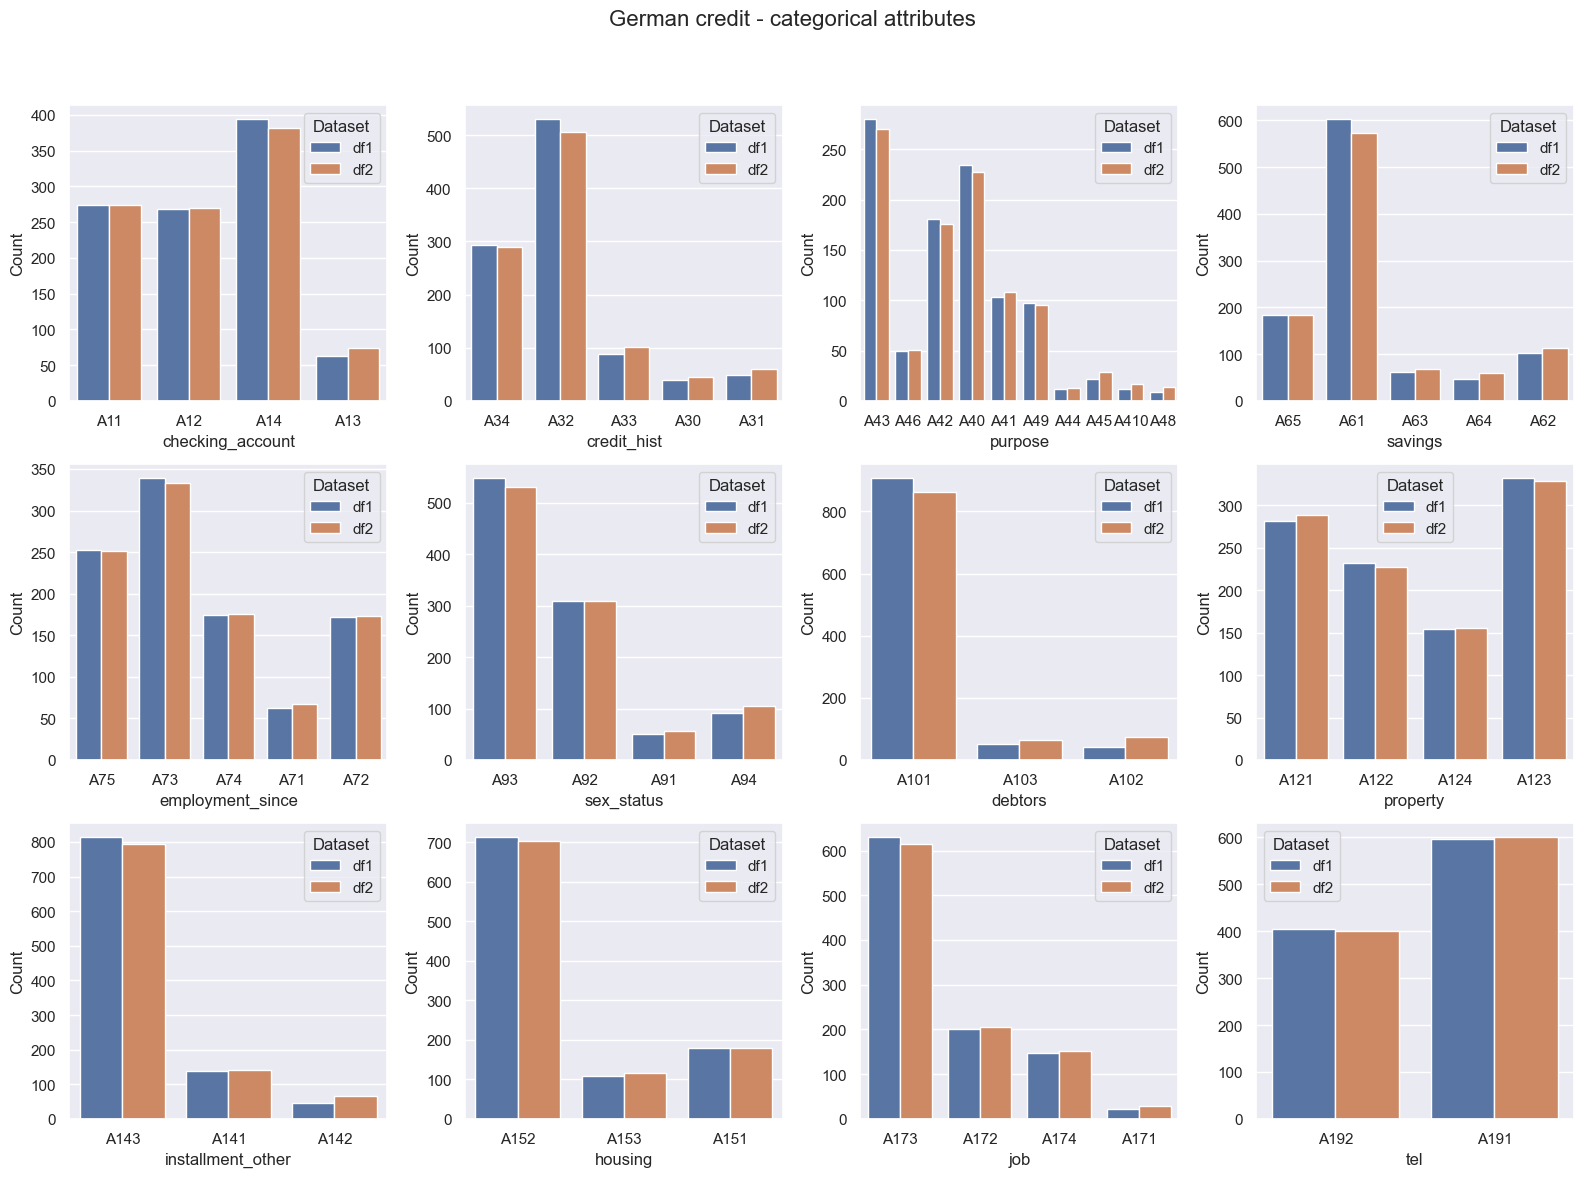

In [117]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.suptitle('German credit - categorical attributes', fontsize=16)

axes = axes.flatten()

original_data.dataframe['dataset'] = ['original' for i in range(len(original_data.dataframe))]
fp_dataset.dataframe['dataset'] = ['fingerprinted' for i in range(len(fp_dataset.dataframe))]
for i, attribute in enumerate(original_data.categorical_attributes[:-1]): # plot 12 out of 13 because... 13
    ax = axes[i]
    sns.countplot(data=pd.concat([original_data.dataframe, 
                                  fp_dataset.dataframe], 
                                 ignore_index=True),
                  x=attribute, hue='dataset', ax=axes[i])
    #ax.set_title(f'Distribution of {attribute}')
    ax.legend(title='Dataset', labels=['df1', 'df2'])
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('evaluation/figures/utility_distributions_german_credit.svg')
plt.savefig('evaluation/figures/utility_distributions_german_credit.png')